In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy




In [2]:
def sampling(target,proposal,M=1,n_samples=1000):
    accepted = 0
    rejected = 0
    while accepted < n_samples:

        xi = proposal.rvs(size=1)
        f = proposal.pdf(xi) * M

        u = f * np.random.uniform(size=1)
        g = target.pdf(xi)
        if u < g:
            accepted += 1
            yield xi
        else:
            rejected += 1

    acceptance = accepted / (accepted + rejected)
    print(f"Acceptance rate: {acceptance}")


Acceptance rate: 0.41017227235438886


(array([0.13442317, 0.59268397, 0.70266657, 0.76987815, 0.73932743,
        0.6660057 , 0.50714196, 0.53158253, 0.37271879, 0.28106663,
        0.24440576, 0.16497389, 0.14053331, 0.08554202, 0.06721158,
        0.01833043, 0.0549913 , 0.01222029, 0.01222029, 0.01222029]),
 array([0.05158502, 0.21524728, 0.37890954, 0.5425718 , 0.70623407,
        0.86989633, 1.03355859, 1.19722085, 1.36088311, 1.52454538,
        1.68820764, 1.8518699 , 2.01553216, 2.17919442, 2.34285669,
        2.50651895, 2.67018121, 2.83384347, 2.99750573, 3.161168  ,
        3.32483026]),
 <BarContainer object of 20 artists>)

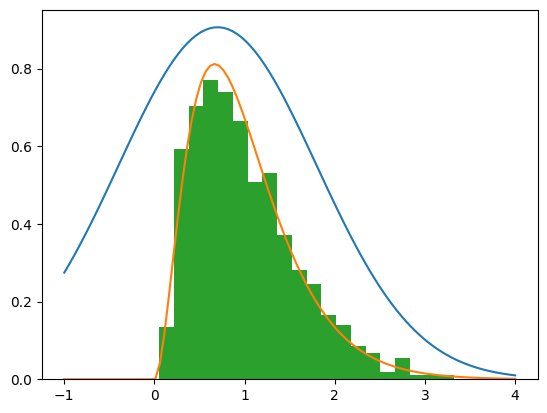

In [15]:
samples = []
grid = np.linspace(-1, 4, 100)
M = 2.5
proposal_distr = scipy.stats.norm(loc=.7, scale=1.1)
target_distr = scipy.stats.gamma(a=3, scale=1/3)
for i in sampling(target_distr,proposal_distr,M=M):
    samples.append(i)

plt.figure()
plt.plot(grid,M * proposal_distr.pdf(grid))
plt.plot(grid,target_distr.pdf(grid))
plt.hist(np.array(samples),density=True,bins=20)